In [1]:
import matplotlib
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
input_df = pd.read_json('./../input/input.txt')

In [3]:
input_df.fillna("", inplace=True)

In [4]:
input_df.head()

,adr_city,adr_state,camera_make,customer_id,event_time,key,last_name,total_amount,type,verb
0,,CA,,,2017-06-04 14:55:05,a1881c06eec9,West,,CUSTOMER,NEW
1,,,,7d112681b8dd,2017-06-03 00:25:45,7d112681b8dd,,913 USD,ORDER,UPDATE
2,Portland,NJ,,,2017-06-05 16:41:17,312a46dc5211,Lucy,,CUSTOMER,UPDATE
3,,,,86f284342106,2017-06-04 11:59:31,86f284342106,,,SITE_VISIT,NEW
4,,,Kodak,7d112681b8dd,2017-06-01 17:11:42,7d112681b8dd,,,IMAGE,UPLOAD


In [5]:
input_df['total_amount_in_dollars'] = pd.to_numeric(input_df['total_amount'].apply(lambda x: x.replace(" USD",""))) 
expenditures_per_customer_sorted = input_df.groupby('customer_id').agg({'total_amount_in_dollars': np.sum}).sort_values('total_amount_in_dollars', ascending = False)

In [6]:
customer_site_visits = input_df[input_df['type'] == 'SITE_VISIT']
site_visit = customer_site_visits.groupby('customer_id')['type'].count()

In [7]:
frames = [expenditures_per_customer_sorted, site_visit]
result = pd.concat(frames, axis=1, join='inner')

In [8]:
result['lifetime_value'] = (52* (result.total_amount_in_dollars / result.type) * 10)
result.sort_values('lifetime_value', ascending = False) 
result.rename(index=str, columns={"type": "count_visits"})

,total_amount_in_dollars,count_visits,lifetime_value
customer_id,,,
7bdeecc97cf8,32975.0,7,2.449571e+06
0b7f849446d3,21576.0,3,3.739840e+06
312a46dc5211,14744.0,3,2.555627e+06
a14c955bda57,8227.0,3,1.426013e+06
b3daa77b4c04,5588.0,3,9.685867e+05
86f284342106,5094.0,5,5.297760e+05
7d112681b8dd,4646.0,2,1.207960e+06
a1881c06eec9,1324.0,1,6.884800e+05
06e6eef6adf2,NaN,2,NaN


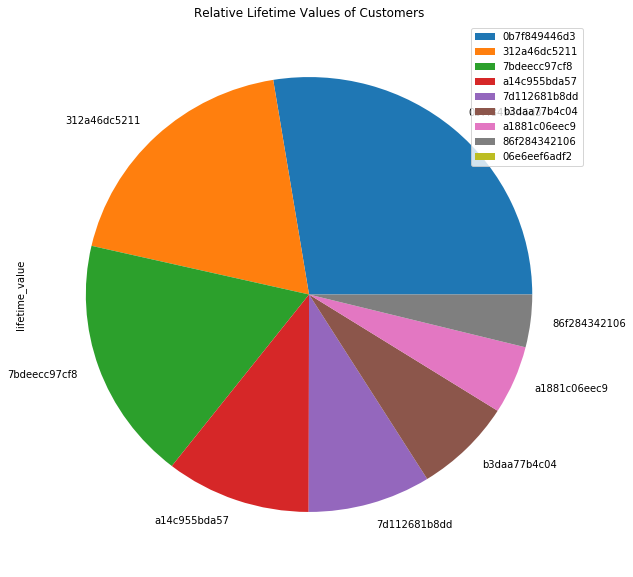

In [9]:
result.sort_values('lifetime_value', ascending = False).plot(kind='pie', y='lifetime_value', figsize=(10, 10), title="Relative Lifetime Values of Customers")

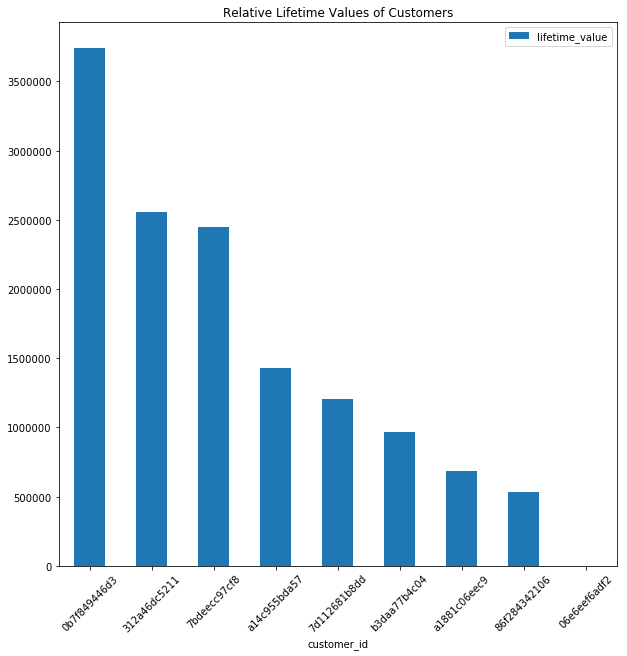

In [10]:
result.sort_values('lifetime_value', ascending = False).plot(kind='bar', y='lifetime_value', figsize=(10, 10), rot=45, title="Relative Lifetime Values of Customers")

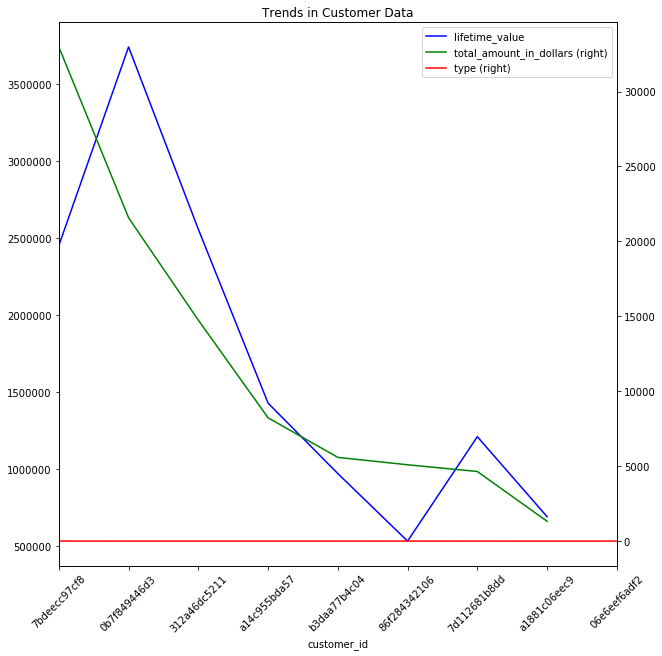

In [11]:
ax = result.plot(kind='line', y='lifetime_value', style='b', figsize=(10, 10), title="Trends in Customer Data", legend=True)
bx = result.plot(secondary_y=True, y='total_amount_in_dollars', style='g', ax=ax)
cx = result.plot(secondary_y=True, y='type', style='r', ax=ax)
ax.set_xticklabels(result.index,rotation=45)

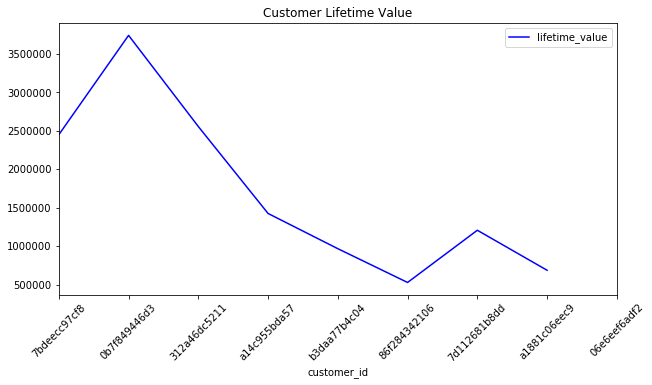

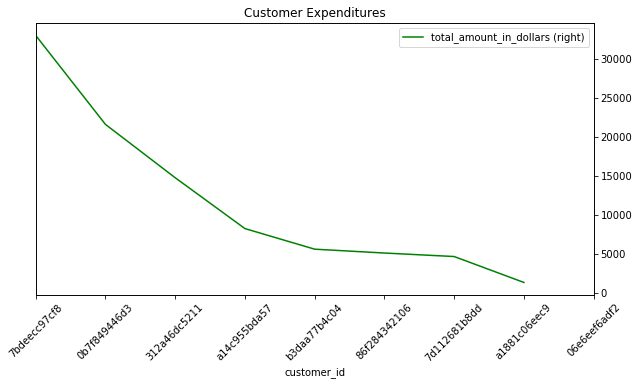

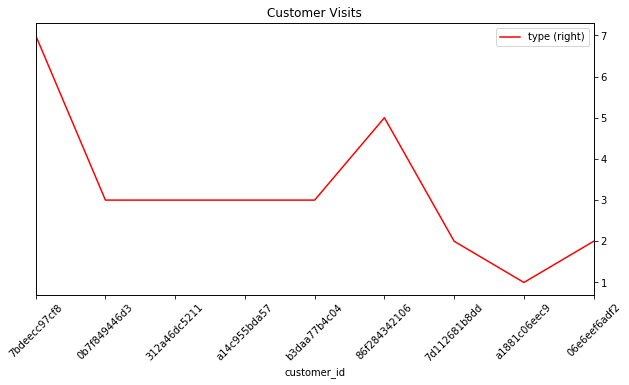

In [12]:
result.plot(kind='line', y='lifetime_value', style='b', title="Customer Lifetime Value", legend=True, rot=45, figsize=(10, 5))
result.plot(secondary_y=True, y='total_amount_in_dollars', style='g', title="Customer Expenditures", legend=True, rot=45, figsize=(10, 5))
result.plot(secondary_y=True, y='type', style='r', title="Customer Visits", legend=True, rot=45, figsize=(10, 5))